# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
loan = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
481,LP002536,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural,Y


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
loan['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [9]:
loan['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

# Data Cleaning

In [10]:
loan.drop(['Loan_ID'], axis =1, inplace = True)

In [39]:
loan.drop(['Education'], axis =1, inplace = True)

In [102]:
loan.drop(['Dependents'], axis =1, inplace = True)

In [103]:
loan

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0,20,6,1,2,1
1,1,1,0,4583,42,28,6,1,0,0
2,1,1,1,3000,0,174,6,1,2,1
3,1,1,0,2583,145,20,6,1,2,1
4,1,0,0,6000,0,41,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0,178,6,1,0,1
610,1,1,0,4106,0,144,2,1,0,1
611,1,1,0,8072,149,111,6,1,2,1
612,1,1,0,7583,0,80,6,1,2,1


In [104]:
# for Null Values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'most_frequent')

loan['Gender'] = imp.fit_transform(loan['Gender'].values.reshape(-1,1))
loan['Married'] = imp.fit_transform(loan['Married'].values.reshape(-1,1))

loan['Self_Employed'] =imp.fit_transform(loan['Self_Employed'].values.reshape(-1,1))
loan['LoanAmount'] = imp.fit_transform(loan['LoanAmount'].values.reshape(-1,1))
loan['Loan_Amount_Term'] = imp.fit_transform(loan['Loan_Amount_Term'].values.reshape(-1,1))
loan['Credit_History'] = imp.fit_transform(loan['Credit_History'].values.reshape(-1,1))

In [105]:
loan

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0,20,6,1,2,1
1,1,1,0,4583,42,28,6,1,0,0
2,1,1,1,3000,0,174,6,1,2,1
3,1,1,0,2583,145,20,6,1,2,1
4,1,0,0,6000,0,41,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0,178,6,1,0,1
610,1,1,0,4106,0,144,2,1,0,1
611,1,1,0,8072,149,111,6,1,2,1
612,1,1,0,7583,0,80,6,1,2,1


In [106]:
loan.isnull().sum()

Gender               0
Married              0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list1 = ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Status', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term']
for var in list1:
    loan[var] = le.fit_transform(loan[var].astype(str))

In [108]:
loan

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0,113,6,1,2,1
1,1,1,0,4583,224,124,6,1,0,0
2,1,1,1,3000,0,84,6,1,2,1
3,1,1,0,2583,52,113,6,1,2,1
4,1,0,0,6000,0,139,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0,88,6,1,0,1
610,1,1,0,4106,0,51,2,1,0,1
611,1,1,0,8072,56,15,6,1,2,1
612,1,1,0,7583,0,182,6,1,2,1


<AxesSubplot:>

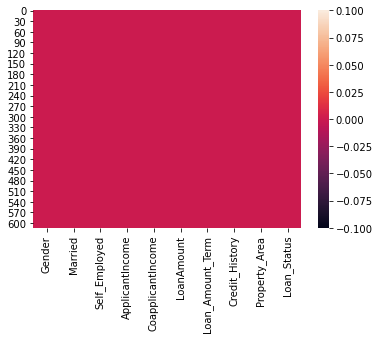

In [109]:
sns.heatmap(loan.isnull())

Summary Statistics

In [110]:
loan.describe()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.133550,5403.459283,80.112378,107.573290,5.664495,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.340446,6109.041673,95.324168,54.195227,1.208241,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2877.500000,0.000000,71.000000,6.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,27.500000,113.000000,6.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,158.750000,148.000000,6.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,286.000000,202.000000,9.000000,1.000000,2.000000,1.000000


In [111]:
loan.skew()

Gender              -1.648795
Married             -0.644850
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    0.778538
LoanAmount          -0.424147
Loan_Amount_Term    -2.373627
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# EDA

<AxesSubplot:>

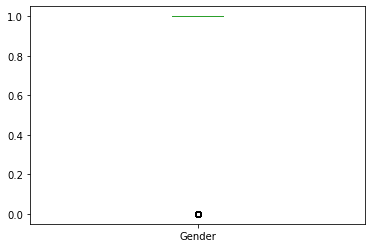

In [112]:
loan['Gender'].plot.box()

<AxesSubplot:>

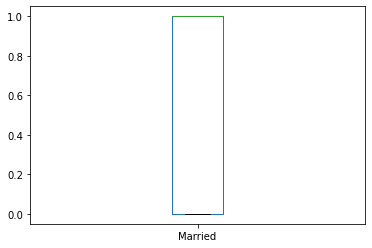

In [113]:
loan['Married'].plot.box()

<AxesSubplot:>

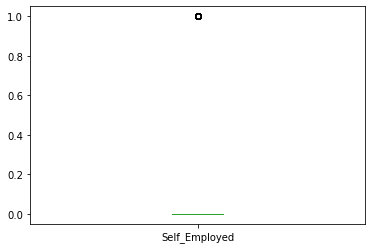

In [114]:
loan['Self_Employed'].plot.box()

<AxesSubplot:>

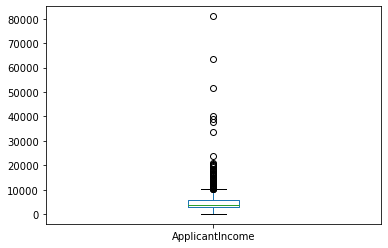

In [115]:
loan['ApplicantIncome'].plot.box()

<AxesSubplot:>

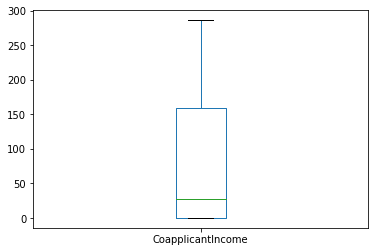

In [116]:
loan['CoapplicantIncome'].plot.box()

<AxesSubplot:>

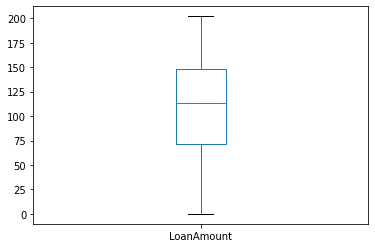

In [117]:
loan['LoanAmount'].plot.box()

<AxesSubplot:>

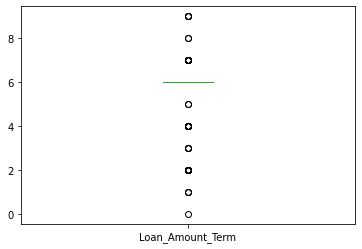

In [118]:
loan['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

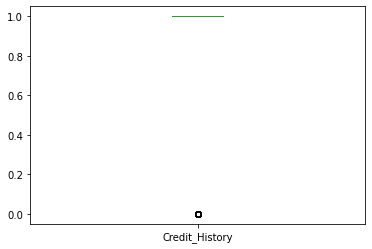

In [119]:
loan['Credit_History'].plot.box()

<AxesSubplot:>

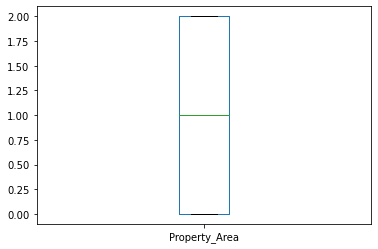

In [120]:
loan['Property_Area'].plot.box()

<AxesSubplot:>

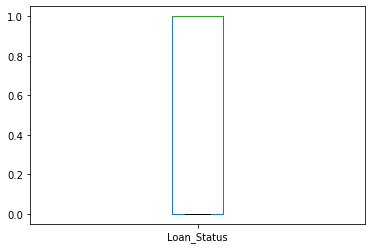

In [121]:
loan['Loan_Status'].plot.box()

# Correlation

In [122]:
loan.corr()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.000525,0.058809,0.155620,0.069330,-0.092841,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.004489,0.051708,0.252223,0.057634,-0.097675,0.010938,0.004257,0.091478
Self_Employed,-0.000525,0.004489,1.000000,0.127180,-0.092453,0.084790,-0.001938,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.127180,1.000000,-0.202125,-0.063434,-0.073092,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.155620,0.252223,-0.092453,-0.202125,1.000000,0.061672,-0.008978,-0.018554,-0.017029,0.049520
LoanAmount,0.069330,0.057634,0.084790,-0.063434,0.061672,1.000000,0.076435,-0.044081,-0.115062,-0.000320
Loan_Amount_Term,-0.092841,-0.097675,-0.001938,-0.073092,-0.008978,0.076435,1.000000,0.046521,-0.086212,-0.004123
Credit_History,0.009170,0.010938,-0.001550,-0.018615,-0.018554,-0.044081,0.046521,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.030860,-0.009500,-0.017029,-0.115062,-0.086212,0.001963,1.000000,0.032112
Loan_Status,0.017987,0.091478,-0.003700,-0.004710,0.049520,-0.000320,-0.004123,0.540556,0.032112,1.000000


<AxesSubplot:>

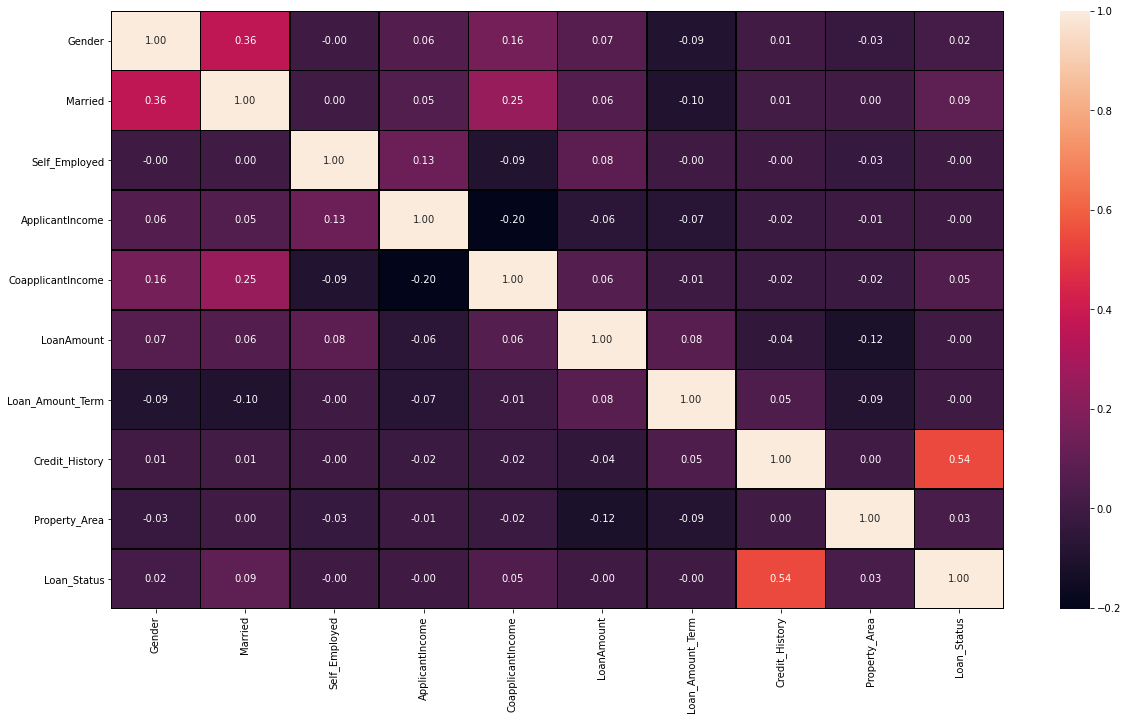

In [123]:
# Correlation using heatmap
plt.figure(figsize=(20,11))
sns.heatmap(loan.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='Gender', ylabel='Density'>

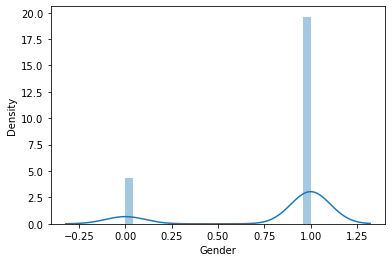

In [124]:
sns.distplot(loan['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

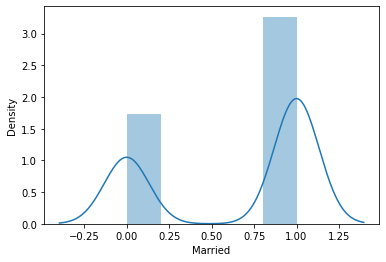

In [125]:
sns.distplot(loan['Married'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

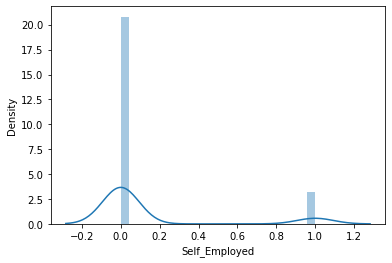

In [126]:
sns.distplot(loan['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

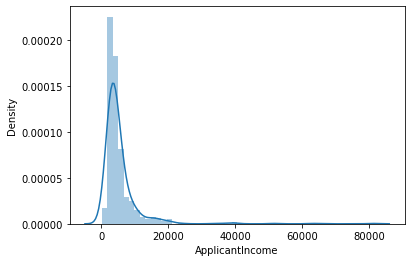

In [127]:
sns.distplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

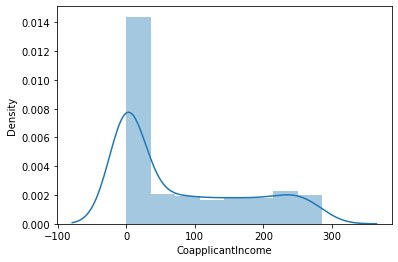

In [128]:
sns.distplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

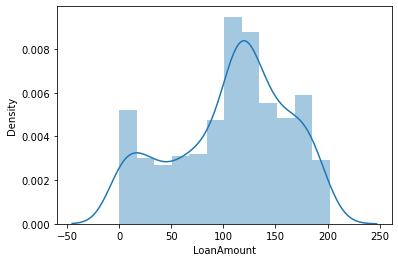

In [129]:
sns.distplot(loan['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

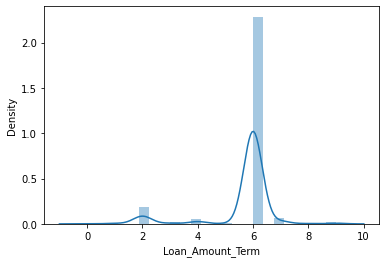

In [130]:
sns.distplot(loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

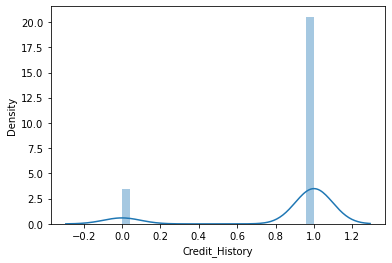

In [131]:
sns.distplot(loan['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

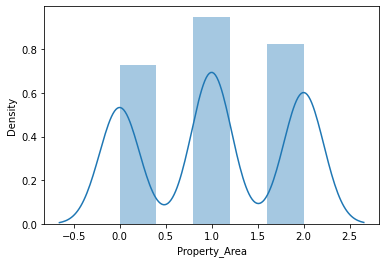

In [132]:
sns.distplot(loan['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

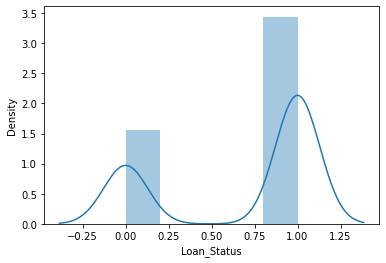

In [133]:
sns.distplot(loan['Loan_Status'])

# Outliers

In [136]:
z = np.abs(zscore(loan))
z

array([[0.47234264, 1.37208932, 0.39260074, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.39260074, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 2.54711697, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.39260074, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.39260074, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 2.54711697, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [137]:
threshold = 3
print(np.where(z>3))

(array([ 14,  62,  66,  91,  94,  98, 100, 115, 126, 128, 133, 142, 144,
       155, 155, 164, 171, 172, 182, 183, 185, 189, 202, 231, 241, 245,
       247, 253, 282, 315, 333, 333, 334, 355, 373, 375, 385, 393, 400,
       409, 429, 443, 453, 461, 466, 471, 497, 513, 539, 540, 554, 590,
       593, 600, 605, 610], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 3, 6, 6, 3, 6, 6, 3, 3, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [138]:
loan_new = loan[(z<3).all(axis =1)]
print(loan.shape)
print(loan_new.shape)

(614, 10)
(560, 10)


# Divide Data in Feature & Vector

In [139]:
x = loan_new.drop(['Loan_Status'], axis =1)
y = loan_new['Loan_Status']

# Remove Skewness

In [140]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

x = power_transform(x , method = 'yeo-johnson')
print(x)

sc =StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 4.91614833e-01 -1.32612997e+00 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 [ 4.91614833e-01  7.54073903e-01 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01 -1.34051940e+00]
 [ 4.91614833e-01  7.54073903e-01  2.54296415e+00 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 ...
 [ 4.91614833e-01  7.54073903e-01 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 [ 4.91614833e-01  7.54073903e-01 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 [-2.03411275e+00 -1.32612997e+00  2.54296415e+00 ... -9.88528554e-05
  -2.48585743e+00  3.68526421e-02]]
[[ 4.91614833e-01 -1.32612997e+00 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 [ 4.91614833e-01  7.54073903e-01 -3.93241879e-01 ... -9.88528554e-05
   4.02275684e-01 -1.34051940e+00]
 [ 4.91614833e-01  7.54073903e-01  2.54296415e+00 ... -9.88528554e-05
   4.02275684e-01  1.21870650e+00]
 ...
 [ 4.91614833e-01  7.54073903e-01 -3.9324187

# Model

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.32      0.21      0.26        28
           1       0.76      0.85      0.80        84

    accuracy                           0.69       112
   macro avg       0.54      0.53      0.53       112
weighted avg       0.65      0.69      0.67       112



# Cross Validation Score

In [229]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.0
accuracy_score is:- 83.03571428571429


At cv:- 3
Cross validation score is:- 80.53974277883196
accuracy_score is:- 83.03571428571429


At cv:- 4
Cross validation score is:- 80.89285714285714
accuracy_score is:- 83.03571428571429


At cv:- 5
Cross validation score is:- 80.89285714285715
accuracy_score is:- 83.03571428571429


At cv:- 6
Cross validation score is:- 80.89681994966827
accuracy_score is:- 83.03571428571429


At cv:- 7
Cross validation score is:- 80.89285714285714
accuracy_score is:- 83.03571428571429


At cv:- 8
Cross validation score is:- 80.89285714285714
accuracy_score is:- 83.03571428571429


At cv:- 9
Cross validation score is:- 80.89833304887067
accuracy_score is:- 83.03571428571429




In [230]:
lsscore_selected = cross_val_score(lr,x,y,cv= 3).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.8053974277883197 
The accuracy score is:  0.8303571428571429


# Naive Bayes Classification

In [231]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [232]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.8214285714285714


In [233]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[ 9 19]
 [ 1 83]]
              precision    recall  f1-score   support

           0       0.90      0.32      0.47        28
           1       0.81      0.99      0.89        84

    accuracy                           0.82       112
   macro avg       0.86      0.65      0.68       112
weighted avg       0.84      0.82      0.79       112



# SVC

In [234]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [235]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8303571428571429


In [236]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [237]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8125


In [238]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [239]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8303571428571429


# KNN Classifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [241]:
print(confusion_matrix(y_test, predknn))

[[10 18]
 [ 7 77]]


In [242]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.59      0.36      0.44        28
           1       0.81      0.92      0.86        84

    accuracy                           0.78       112
   macro avg       0.70      0.64      0.65       112
weighted avg       0.75      0.78      0.76       112



# Decision Tree Classifier

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [246]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [245]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        28
           1       0.80      0.80      0.80        84

    accuracy                           0.70       112
   macro avg       0.60      0.60      0.60       112
weighted avg       0.70      0.70      0.70       112



 Best performing model is SVC

# AUC - ROC Curve

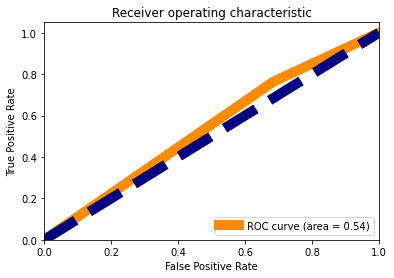

In [247]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving:

In [248]:
import pickle
import pickle
filename = 'Loan_Application_project.pkl'
pickle.dump(svc, open(filename, 'wb'))

# Conclusion

In [249]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
con = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
con

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
107,1,1
108,1,1
109,1,1
110,1,1
